In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import time 
import random
from tkinter import *

#### REading dataset

In [3]:
df=pd.read_csv(r'C:\Users\varsh\OneDrive\Documents\INSE 6180\data.csv',error_bad_lines=False)
df.head()

b'Skipping line 2810: expected 2 fields, saw 5\nSkipping line 4641: expected 2 fields, saw 5\nSkipping line 7171: expected 2 fields, saw 5\nSkipping line 11220: expected 2 fields, saw 5\nSkipping line 13809: expected 2 fields, saw 5\nSkipping line 14132: expected 2 fields, saw 5\nSkipping line 14293: expected 2 fields, saw 5\nSkipping line 14865: expected 2 fields, saw 5\nSkipping line 17419: expected 2 fields, saw 5\nSkipping line 22801: expected 2 fields, saw 5\nSkipping line 25001: expected 2 fields, saw 5\nSkipping line 26603: expected 2 fields, saw 5\nSkipping line 26742: expected 2 fields, saw 5\nSkipping line 29702: expected 2 fields, saw 5\nSkipping line 32767: expected 2 fields, saw 5\nSkipping line 32878: expected 2 fields, saw 5\nSkipping line 35643: expected 2 fields, saw 5\nSkipping line 36550: expected 2 fields, saw 5\nSkipping line 38732: expected 2 fields, saw 5\nSkipping line 40567: expected 2 fields, saw 5\nSkipping line 40576: expected 2 fields, saw 5\nSkipping line 

,password,strength
0,kzde5577,1
1,kino3434,1
2,visi7k1yr,1
3,megzy123,1
4,lamborghin1,1


<AxesSubplot:xlabel='strength', ylabel='count'>

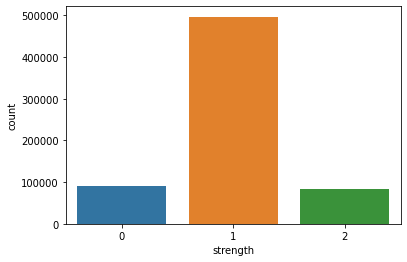

In [4]:
sns.countplot(df['strength'])

In [5]:
df['count'] = df['password'].str.len() #Number of characters in password
df['num'] = df['password'].apply(lambda x: len([str(x) for x in str(x) if x.isdigit()])) #No. of numerals in password
df['alphabets'] = df['password'].apply(lambda x: len([x for x in str(x) if x.isalpha()])) #No. of alphabets in password

In [6]:
df.head()

,password,strength,count,num,alphabets
0,kzde5577,1,8.0,4,4
1,kino3434,1,8.0,4,4
2,visi7k1yr,1,9.0,2,7
3,megzy123,1,8.0,3,5
4,lamborghin1,1,11.0,1,10


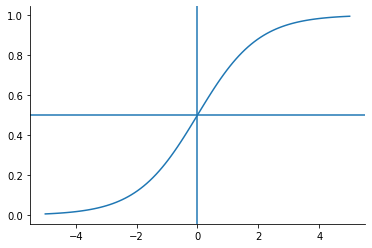

In [7]:
#plot logistic function 
import math
import matplotlib.pyplot as plt 
x_values = np.linspace(-5, 5, 100)
y_values = [1 / (1 + math.e**(-x)) for x in x_values]
plt.plot(x_values, y_values)
plt.axhline(.5)
plt.axvline(0)
sns.despine()

In [8]:
def logistic_func(theta, x):
    return float(1) / (1 + math.e**(-x.dot(theta)))

def log_gradient(theta, x, y):
    first_calc = logistic_func(theta, x) - np.squeeze(y)
    final_calc = first_calc.T.dot(x)
    return final_calc

def cost_func(theta, x, y):
    log_func_v = logistic_func(theta,x)
    y = np.squeeze(y)
    step1 = y * np.log(log_func_v)
    step2 = (1-y) * np.log(1 - log_func_v)
    final = -step1 - step2
    return np.mean(final)

def grad_desc(theta_values, X, y, lr=.001, converge_change=.001):
    #normalize
    X = (X - np.mean(X, axis=0)) / np.std(X, axis=0)
    #setup cost iter
    cost_iter = []
    cost = cost_func(theta_values, X, y)
    cost_iter.append([0, cost])
    change_cost = 1
    i = 1
    while(change_cost > converge_change):
        old_cost = cost
        theta_values = theta_values - (lr * log_gradient(theta_values, X, y))
        cost = cost_func(theta_values, X, y)
        cost_iter.append([i, cost])
        change_cost = old_cost - cost
        i+=1
    return theta_values, np.array(cost_iter)

def pred_values(theta, X, hard=True):
    #normalize
    X = (X - np.mean(X, axis=0)) / np.std(X, axis=0)
    pred_prob = logistic_func(theta, X)
    pred_value = np.where(pred_prob >= .5, 1, 0)
    if hard:
        return pred_value
    return pred_prob

In [9]:
df.dropna(inplace=True)
X = df.iloc[:,2:]


In [10]:
dummy = df.strength
d = dummy.replace(1,0)
y = d.replace(2,1)

In [11]:
y.value_counts()

0    586502
1     83137
Name: strength, dtype: int64

In [12]:
#beta values 
shape = X.shape[1]
betas = np.zeros(shape)
fitted_values, cost_iter = grad_desc(betas, X, y)
print(fitted_values)

count        175.146406
num           -3.379669
alphabets    155.123504
dtype: float64


In [13]:
predicted_y = pred_values(fitted_values, X)
predicted_y

array([0, 0, 0, ..., 1, 0, 0])

In [14]:
np.sum(y == predicted_y)
from sklearn.metrics import accuracy_score
print("Test acc: {}".format(accuracy_score(y, predicted_y)))

Test acc: 0.7061894543179236


In [15]:
from sklearn.metrics import classification_report
print(classification_report(y, predicted_y))


              precision    recall  f1-score   support

           0       1.00      0.66      0.80    586502
           1       0.30      1.00      0.46     83137

    accuracy                           0.71    669639
   macro avg       0.65      0.83      0.63    669639
weighted avg       0.91      0.71      0.76    669639

